In [17]:
#importing the dataset
import pandas as pd
from tqdm.auto import tqdm

# Parsing the text data into a DataFrame
try:
    # Read the file, ignoring the first line which is the header
    with open('Data.csv', 'r', encoding='utf-8') as file:
        # Skip the first line for the header
        text_data = file.readlines()[1:]

    # Create a DataFrame with a single column 'text'
    df_text = pd.DataFrame(text_data, columns=['text'])
    # Clean up the text by stripping newlines
    df_text['text'] = df_text['text'].str.strip()
except Exception as e:
    df_error = str(e)

# Output
{'df_head': df_text.head() if 'df_text' in locals() else '', 'df_error': df_error if 'df_error' in locals() else 'DataFrame created successfully.'}

{'df_head':                                                 text
 0  "🧡@KeplerHomes AirdropBox event for #Arbitrum ...
 1                                                   
 2                           💙Invitation code: 52DC39
 3         🏆Airdrop Portal:👉 https://t.co/fudohu97uV"
 4  "Remember, success in online business is a mar...,
 'df_error': 'DataFrame created successfully.'}

In [18]:
#processing data and storing it in a new csv file
import pandas as pd

# Read the file line by line and create a list of dictionaries, assuming each line is a separate entry under 'Text' column
entries = []
with open('Data.csv', 'r', encoding='utf-8') as file:
    next(file)  # Skip the header
    for line in file:
        # Skip empty lines
        if line.strip():
            entries.append({'Text': line.strip()})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(entries)

# Save the DataFrame to a new CSV file
processed_file_path = 'Processed_Data.csv'
df.to_csv(processed_file_path, index=False)

# Display the head of the DataFrame to confirm it's loaded correctly
print(df.head())

                                                Text
0  "🧡@KeplerHomes AirdropBox event for #Arbitrum ...
1                           💙Invitation code: 52DC39
2         🏆Airdrop Portal:👉 https://t.co/fudohu97uV"
3  "Remember, success in online business is a mar...
4  For more tips and Strategies, follow me 👉 @coa...


In [19]:
# Update the cleaning function to handle non-string data WITHOUT EMOJI
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm

# Load the processed data
file_path = 'Processed_Data.csv'
df = pd.read_csv(file_path)

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    if not isinstance(text, str):
        return ''  # Return empty string for non-string data
    text = text.lower()  # Lowercase text
    text = re.sub(r'http\S+|www\S+', 'URL', text)
    text = re.sub(r'@\w+', 'USER', text)  # Replace usernames
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabets
    text = re.sub(r'(.)\1+', r'\1', text)  # Remove consecutive letters
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove short words
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])  # Remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])  # Lemmatize
    return text

# Apply the cleaning function to the 'Text' column
progress_bar = tqdm(total=df.shape[0], desc='Cleaning Text')
for i, row in df.iterrows():
    df.at[i, 'Text'] = clean_text(row['Text'])
    progress_bar.update(1)
progress_bar.close()

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'Cleaned_Processed_Data.csv'
df.to_csv(cleaned_file_path, index=False)

# Display the head of the cleaned DataFrame
print(df.head())

Cleaning Text:   0%|          | 0/66460 [00:00<?, ?it/s]

                                                Text
0  airdropbox event arbitrum ecological user tota...
1                                    invitation code
2                                     airdrop portal
3  remember suces online busines marathon sprint ...
4                                 tip strategy folow


In [20]:
#CLEANED DATA WITH EMOJIS
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm

# Load the processed data
file_path = 'Processed_Data.csv'
df = pd.read_csv(file_path)

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
# This time, we will preserve emojis and replace URLs and usernames as specified
def clean_text(text):
    text = re.sub(r'(https?://\S+|www\.\S+)', 'URL', text)  # Replace URLs
    text = re.sub(r'@\w+', 'USER', text)  # Replace usernames with 'USER'
    text = text.lower()  # Lowercase text
     # Remove special characters and numbers except emojis
    text = re.sub(r'[^\w\s\U00010000-\U0010FFFF]', '', text)
    #text = re.sub(r'[^a-z\s\ud800-\udfff]', '', text)  # Remove non-alphabets except emojis
    text = re.sub(r'(.)\1+', r'\1', text)  # Remove consecutive letters
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove short words
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])  # Remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])  # Lemmatize
    return text

# Apply the cleaning function to the 'Text' column
progress_bar = tqdm(total=df.shape[0], desc='Cleaning Text')
for i, row in df.iterrows():
    df.at[i, 'Text'] = clean_text(row['Text'])
    progress_bar.update(1)
progress_bar.close()

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'Emoji_Preserved_Cleaned_Processed_Data.csv'
df.to_csv(cleaned_file_path, index=False)

# Display the head of the cleaned DataFrame
print(df.head())

Cleaning Text:   0%|          | 0/66460 [00:00<?, ?it/s]

                                                Text
0  🧡user airdropbox event arbitrum ecological use...
1                            💙invitation code 52dc39
2                               🏆airdrop portal👉 url
3  remember suces online busines marathon sprint ...
4                        tip strategy folow user url


C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 0:
   url, user, shop, link, read, get, check, live, watch, join

Cluster 1:
   execution, law, governor, firing, bil, squad, idaho, sign, employengagement, employment

Cluster 2:
   user, live, amp, new, check, get, product, fre, starting, wil



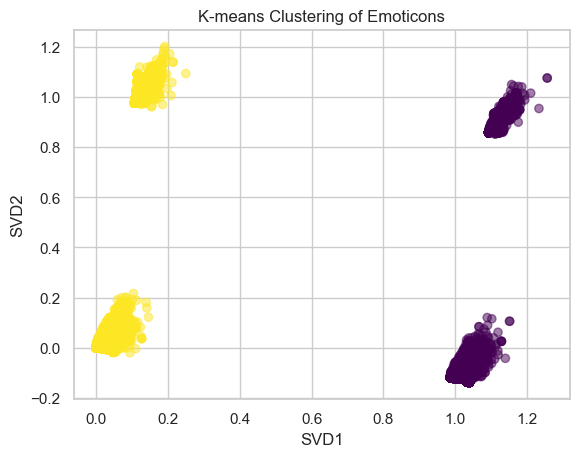

In [21]:
#K-Means Clustering
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load your data into a DataFrame
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# Assuming you have a column named 'Text'
column_name = 'Text'

# Drop rows with NaN values in the 'Text' column
df = df.dropna(subset=[column_name])

# Convert text with emojis to a document-term matrix
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b|<Emoji>', binary=True)
X = vectorizer.fit_transform(df[column_name])

# Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Print the top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"Cluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print("  ", ", ".join(top_terms))
    print()

# Reduce dimensionality for visualization (using TruncatedSVD)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Add the reduced components to the DataFrame
df[['SVD1', 'SVD2']] = X_svd

# Visualize the clusters
plt.scatter(df['SVD1'], df['SVD2'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Emoticons')
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.show()


Processing rows: 0it [00:00, ?it/s]

👉 8050
👈 1400
🥺 483
👇 455
🔥 318
🔴 287
💥 271
🎯 229
🎉 180
😍 168
🏆 154
📺 138
🐰 125
🚀 122
👀 122
😳 120
💯 119
👌 119
🥊 119
💰 117
👍 110
🚨 109
🙏 105
😭 100
🥹 99
🤣 97
😂 96
😎 90
🔗 89
💙 88


C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128072 (\N{WHITE LEFT POINTING BACKHAND INDEX}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:1

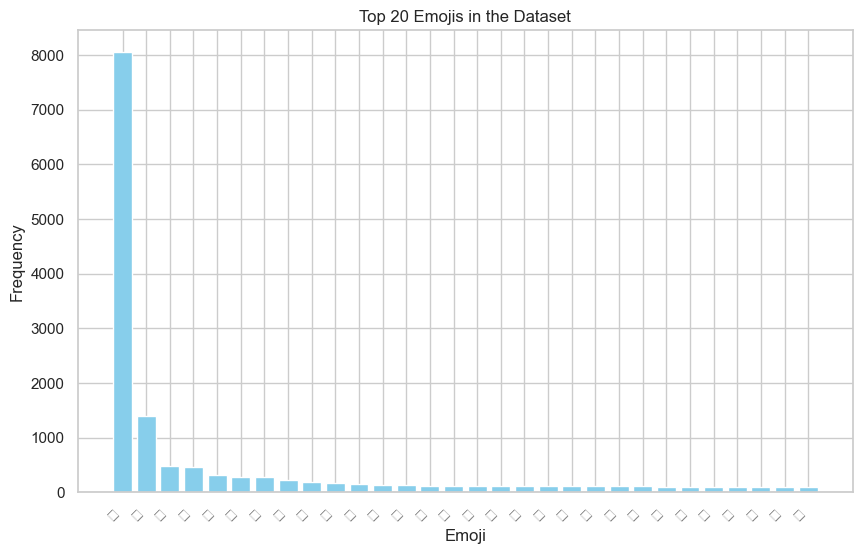

In [22]:
#Emoji Frequency Analysis
import csv
from collections import Counter
from tqdm.auto import tqdm
import emoji
import matplotlib.pyplot as plt

# Define a function to extract emojis from a text
def extract_emojis(text):
    return [char for char in text if emoji.core.is_emoji(char)]

# Load the data
file_path = 'Emoji_Preserved_Cleaned_Processed_Data.csv'

# Initialize an empty list to store all emojis
all_emojis = []

# Read the file and extract emojis
with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in tqdm(reader, desc='Processing rows'):
        all_emojis.extend(extract_emojis(row[0]))

# Count the frequency of each emoji
emoji_counter = Counter(all_emojis)

# Sort emojis by frequency
sorted_emojis = sorted(emoji_counter.items(), key=lambda item: item[1], reverse=True)

# Display the 30 most common emojis
for emoji, count in sorted_emojis[:30]:
    print(emoji, count)

# Visualization
top_emojis, counts = zip(*sorted_emojis[:30])

plt.figure(figsize=(10, 6))
plt.bar(top_emojis, counts, color='skyblue')
plt.title('Top 20 Emojis in the Dataset')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


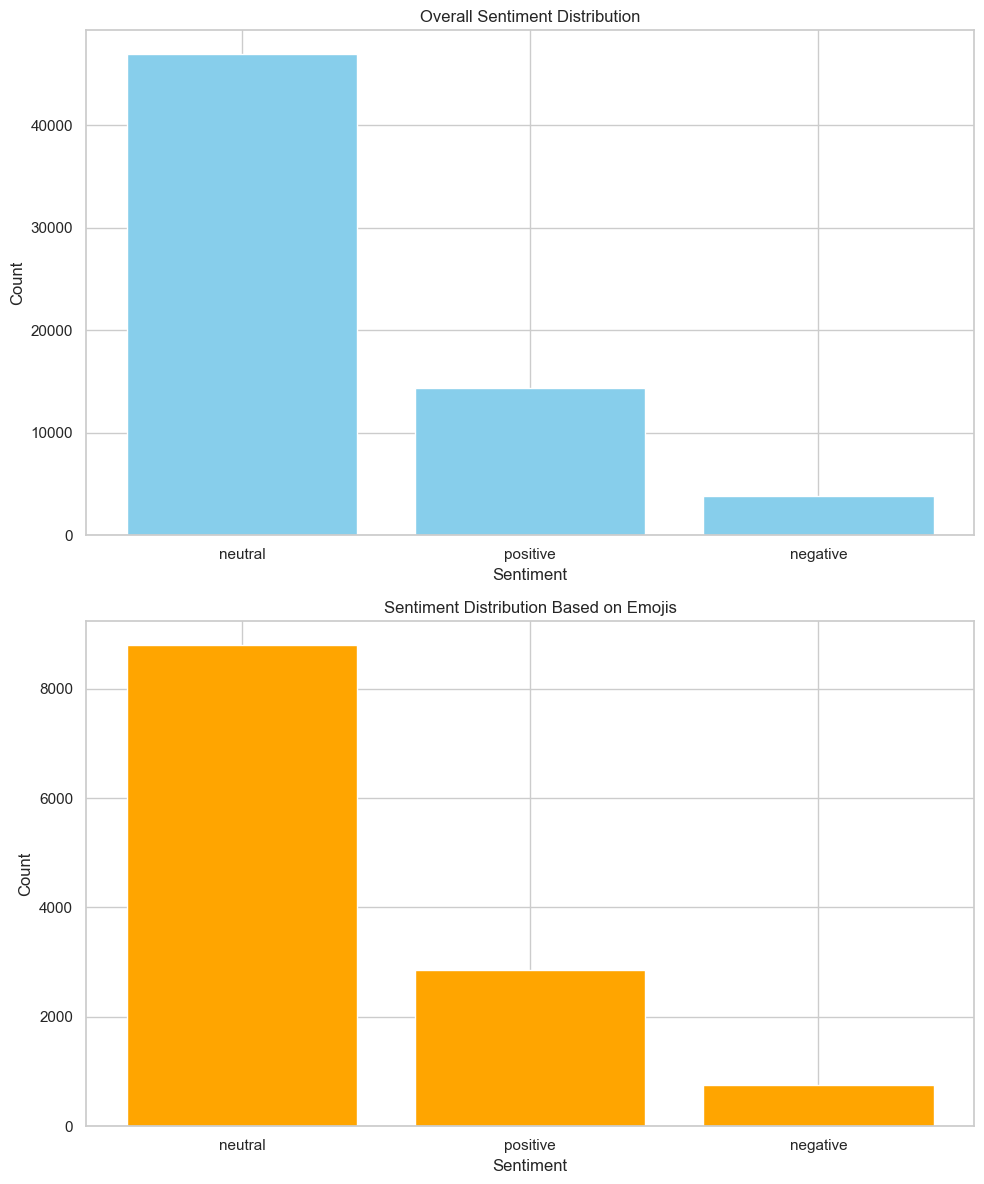

In [23]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')

# Load your data into a DataFrame
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# We have a column named 'Text' containing tweets
tweets = df['Text']

# Initialize the SentimentIntensityAnalyzer from NLTK
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and add a new column 'Sentiment' to the DataFrame
df['Sentiment'] = tweets.apply(lambda text: 'positive' if sia.polarity_scores(str(text))['compound'] >= 0.05
                               else 'negative' if sia.polarity_scores(str(text))['compound'] <= -0.05
                               else 'neutral' if pd.notnull(text) else None)

# Drop rows with missing values in the 'Sentiment' column
df = df.dropna(subset=['Sentiment'])

# Display the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Visualize the distribution of sentiments based on emojis
emoji_sentiment_distribution = df[df['Text'].apply(lambda text: any(emoji.core.is_emoji(char) for char in str(text)))]['Sentiment'].value_counts()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot overall sentiment distribution
ax[0].bar(sentiment_distribution.index, sentiment_distribution.values, color='skyblue')
ax[0].set_title('Overall Sentiment Distribution')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Count')

# Plot sentiment distribution based on emojis
ax[1].bar(emoji_sentiment_distribution.index, emoji_sentiment_distribution.values, color='orange')
ax[1].set_title('Sentiment Distribution Based on Emojis')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [24]:
#CONTEXTUAL ANALYSIS USING LDA
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim

# Load your data into a DataFrame
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# We have a column named 'Text' containing tweets
tweets = df['Text']

# Preprocess the text data (tokenization and stopword removal)
stop_words = set(stopwords.words('english'))
tokenized_tweets = tweets.apply(lambda text: [word.lower() for word in word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])

# Convert tokenized text to a document-term matrix (Count Vectorization)
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(tokenized_tweets)

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 5  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Assign topics to tweets
df['Topic'] = lda.transform(X).argmax(axis=1)

# Display the top terms for each topic
terms = vectorizer.get_feature_names_out()
topics_words = {}
for i, topic in enumerate(lda.components_):
    topic_words = [terms[j] for j in topic.argsort()[:-10 - 1:-1]]
    topics_words[f'Topic {i}'] = topic_words
    print(f'Topic {i}: {topic_words}')

# Display the distribution of tweets across topics
topic_distribution = df['Topic'].value_counts()
print("\nTweet Distribution Across Topics:")
print(topic_distribution)


C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Topic 0: ['get', 'new', 'website', 'create', 'today', 'eth', 'game', 'crypto', 'buy', 'starting']
Topic 1: ['url', 'user', 'nan', 'shop', 'link', 'read', 'folow', 'whale', 'insight', 'realtime']
Topic 2: ['easter', 'april', 'streaming', 'starting', 'day', 'enjoy', 'live', 'sale', 'hapy', 'one']
Topic 3: ['check', 'live', 'fre', 'product', 'amp', 'stream', 'online', 'watch', 'code', 'binance']
Topic 4: ['user', 'new', 'wil', 'know', 'dont', 'like', 'people', 'amp', 'god', 'time']

Tweet Distribution Across Topics:
Topic
1    22743
4    12625
0    12042
2    10104
3     8946
Name: count, dtype: int64


C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Topic 0: ['get', 'new', 'website', 'create', 'today', 'eth', 'game', 'crypto', 'buy', 'starting']
Topic 1: ['url', 'user', 'nan', 'shop', 'link', 'read', 'folow', 'whale', 'insight', 'realtime']
Topic 2: ['easter', 'april', 'streaming', 'starting', 'day', 'enjoy', 'live', 'sale', 'hapy', 'one']
Topic 3: ['check', 'live', 'fre', 'product', 'amp', 'stream', 'online', 'watch', 'code', 'binance']
Topic 4: ['user', 'new', 'wil', 'know', 'dont', 'like', 'people', 'amp', 'god', 'time']

Tweet Distribution Across Topics:
Topic
1    22743
4    12625
0    12042
2    10104
3     8946
Name: count, dtype: int64


C:\Users\joshi\AppData\Local\Temp\ipykernel_24956\2766678388.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




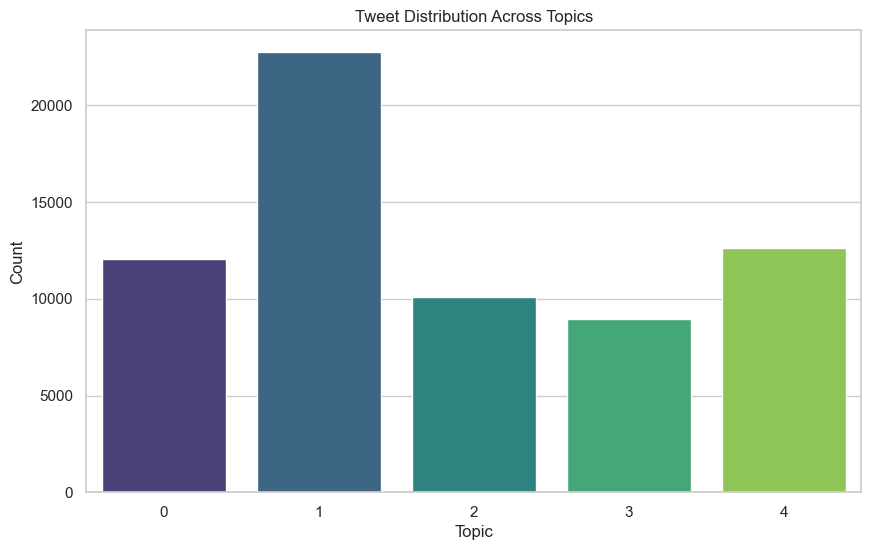

In [25]:
#Contextual Segmentation using visualisation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

# Load your data into a DataFrame
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# Assuming you have a column named 'Text' containing tweets
tweets = df['Text']

# Preprocess the text data (tokenization and stopword removal)
stop_words = set(stopwords.words('english'))
tokenized_tweets = tweets.apply(lambda text: [word.lower() for word in word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])

# Convert tokenized text to a document-term matrix (Count Vectorization)
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(tokenized_tweets)

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 5  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Assign topics to tweets
df['Topic'] = lda.transform(X).argmax(axis=1)

# Display the top terms for each topic
terms = vectorizer.get_feature_names_out()
topics_words = {}
for i, topic in enumerate(lda.components_):
    topic_words = [terms[j] for j in topic.argsort()[:-10 - 1:-1]]
    topics_words[f'Topic {i}'] = topic_words
    print(f'Topic {i}: {topic_words}')

# Display the distribution of tweets across topics
topic_distribution = df['Topic'].value_counts()
print("\nTweet Distribution Across Topics:")
print(topic_distribution)

# Visualize the distribution of tweets across topics
plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', data=df, palette='viridis')
plt.title('Tweet Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

In [26]:
#EMOTICON MEANING ANALYSIS 
import pandas as pd
import spacy
from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np

# Load your data into a DataFrame
# Replace 'your_dataset.csv' with the actual path or data loading method
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# Assuming you have a column named 'Text' containing tweets
tweets = df['Text']

# Load pre-trained spaCy model with word vectors
nlp = spacy.load('en_core_web_sm')

# Select emojis for visualization
emojis_for_visualization = ['👉', '👈', '🥺', '👇', '🔥', '🔴', '💥', '🎯', '🎉', '😍', '🏆', '📺', '🐰', '🚀', '👀', '😳', '💯', '👌', '🥊', '💰', '👍', '🚨', '🙏', '😭', '🥹', '😂', '😎', '🔗', '💙']

# Get embeddings for selected emojis
emoji_embeddings = np.array([nlp(emoji).vector for emoji in emojis_for_visualization])

# Apply t-SNE for dimensionality reduction with reduced perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
emoji_tsne = tsne.fit_transform(emoji_embeddings)

# Create a DataFrame for visualization
df_viz = pd.DataFrame({'Emoji': emojis_for_visualization, 'tsne_dim1': emoji_tsne[:, 0], 'tsne_dim2': emoji_tsne[:, 1]})

# Plot the embeddings in 2D space with emojis using plotly express
fig = px.scatter(df_viz, x='tsne_dim1', y='tsne_dim2', text='Emoji', title='t-SNE Visualization of Emoji Embeddings')
fig.update_traces(textposition='bottom right')  # Adjust text position for better visibility
fig.show()


In [27]:
#EMOTICON MEANING ANALYSIS WITHOUT VISUALISATION
import pandas as pd
import spacy
from sklearn.manifold import TSNE
import numpy as np

# Load your data into a DataFrame
# Replace 'your_dataset.csv' with the actual path or data loading method
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# Assuming you have a column named 'Text' containing tweets
tweets = df['Text']

# Load pre-trained spaCy model with word vectors
nlp = spacy.load('en_core_web_sm')

# Select emojis for analysis
emojis_for_analysis = ['👉', '👈', '🥺', '👇', '🔥', '🔴', '💥', '🎯', '🎉', '😍', '🏆', '📺', '🐰', '🚀', '👀', '😳', '💯', '👌', '🥊', '💰', '👍', '🚨', '🙏', '😭', '🥹', '😂', '😎', '🔗', '💙']

# Get embeddings for selected emojis
emoji_embeddings = np.array([nlp(emoji).vector for emoji in emojis_for_analysis])

# Save the embeddings and corresponding emojis to a DataFrame
df_embeddings = pd.DataFrame({'Emoji': emojis_for_analysis, 'embedding': emoji_embeddings.tolist()})

# Save or use df_embeddings for further analysis
df_embeddings.to_csv('emoji_embeddings.csv', index=False)


In [28]:
#Contextual segmentation using LDA
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your data into a DataFrame
df = pd.read_csv('Emoji_Preserved_Cleaned_Processed_Data.csv')

# column named 'Text' containing tweets
tweets = df['Text']

# Preprocess the text data (tokenization and stopword removal)
stop_words = set(stopwords.words('english'))
tokenized_tweets = tweets.apply(lambda text: [word.lower() for word in word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])

# Convert tokenized text to a document-term matrix (Count Vectorization)
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(tokenized_tweets)

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 5  # You can adjust the number of topics based on your dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Assign topics to tweets
df['Topic'] = lda.transform(X).argmax(axis=1)

# Add a new column 'Context' to the DataFrame
df['Context'] = f'Topic {df["Topic"]}'

# Save the DataFrame with the new column as a new CSV file
df.to_csv('Emoji_Preserved_Cleaned_Contexts.csv', index=False)

# Display the top terms for each topic
terms = vectorizer.get_feature_names_out()
topics_words = {}
for i, topic in enumerate(lda.components_):
    topic_words = [terms[j] for j in topic.argsort()[:-10 - 1:-1]]
    topics_words[f'Topic {i}'] = topic_words
    print(f'Topic {i}: {topic_words}')

# Display the distribution of tweets across topics
topic_distribution = df['Topic'].value_counts()
print("\nTweet Distribution Across Topics:")
print(topic_distribution)


C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Topic 0: ['get', 'new', 'website', 'create', 'today', 'eth', 'game', 'crypto', 'buy', 'starting']
Topic 1: ['url', 'user', 'nan', 'shop', 'link', 'read', 'folow', 'whale', 'insight', 'realtime']
Topic 2: ['easter', 'april', 'streaming', 'starting', 'day', 'enjoy', 'live', 'sale', 'hapy', 'one']
Topic 3: ['check', 'live', 'fre', 'product', 'amp', 'stream', 'online', 'watch', 'code', 'binance']
Topic 4: ['user', 'new', 'wil', 'know', 'dont', 'like', 'people', 'amp', 'god', 'time']

Tweet Distribution Across Topics:
Topic
1    22743
4    12625
0    12042
2    10104
3     8946
Name: count, dtype: int64


In [29]:
#Sentiment Analysis within contexts
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the DataFrame with the 'Context' column
df = pd.read_csv('Emoji_Preserved_Cleaned_Contexts.csv')

# Initialize NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and add a new column 'Sentiment' to the DataFrame
def get_sentiment(text):
    if pd.notnull(text):
        compound_score = sia.polarity_scores(text)['compound']
        if compound_score >= 0.05:
            return 'positive'
        elif compound_score <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    else:
        return None

df['Sentiment'] = df['Text'].apply(get_sentiment)

# Display the distribution of sentiments within each context
sentiment_distribution = df.groupby('Context')['Sentiment'].value_counts().unstack(fill_value=0)
print("\nSentiment Distribution Within Each Context:")
print(sentiment_distribution)

# Save the DataFrame with the sentiment information as a new CSV file
df.to_csv('Emoji_Preserved_Cleaned_Contexts_Sentiments.csv', index=False)



Sentiment Distribution Within Each Context:
Sentiment                                           negative  neutral  \
Context                                                                 
Topic 0        0\n1        3\n2        1\n3    ...      3808    46933   

Sentiment                                           positive  
Context                                                       
Topic 0        0\n1        3\n2        1\n3    ...     14362  


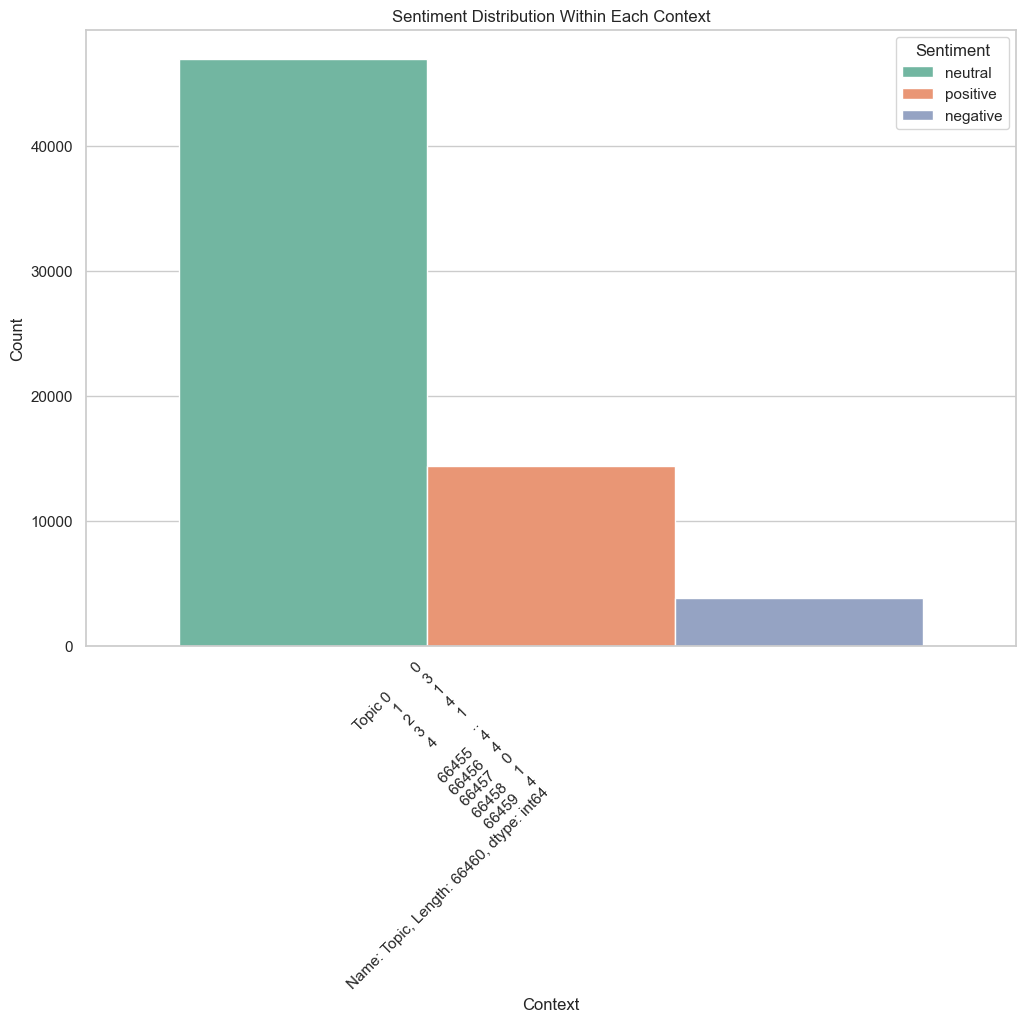

In [30]:
#Sentiment analysis within context along with visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the DataFrame with the 'Context' column
df = pd.read_csv('Emoji_Preserved_Cleaned_Contexts.csv')

# Initialize NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and add a new column 'Sentiment' to the DataFrame
def get_sentiment(text):
    if pd.notnull(text):
        compound_score = sia.polarity_scores(text)['compound']
        if compound_score >= 0.05:
            return 'positive'
        elif compound_score <= -0.05:
            return 'negative'

        else:
            return 'neutral'
    else:
        return None

df['Sentiment'] = df['Text'].apply(get_sentiment)

# Display the distribution of sentiments within each context
sentiment_distribution = df.groupby('Context')['Sentiment'].value_counts().unstack(fill_value=0)

# Plot the sentiment distribution for each context
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.countplot(x="Context", hue="Sentiment", data=df, palette="Set2")
plt.title('Sentiment Distribution Within Each Context')
plt.xlabel('Context')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()


In [31]:
#Frequency Analysis within context without visualisation
import pandas as pd

# Load the DataFrame with the 'Context' and 'Text' columns
df = pd.read_csv('Emoji_Preserved_Cleaned_Contexts.csv')

# Specify the target emojis of interest
target_emojis = ['👉', '👈', '🥺', '👇', '🔥', '🔴', '💥', '🎯', '🎉', '😍', '🏆', '📺', '🐰', '🚀', '👀', '😳', '💯', '👌', '🥊', '💰', '👍', '🚨', '🙏', '😭', '🥹', '😂', '😎', '🔗', '💙']

# Create a new column 'Emoticon_Frequency' for each target emoji to store their frequency in each context
for emoji in target_emojis:
    df[f'{emoji}_Frequency'] = df['Text'].apply(lambda text: str(text).count(emoji) if pd.notnull(text) else 0)

# Group by 'Context' and calculate the total frequency of each target emoji in each context
emoticon_frequency_by_context = df.groupby('Context')[[f'{emoji}_Frequency' for emoji in target_emojis]].sum().reset_index()

# Display the resulting DataFrame
print(emoticon_frequency_by_context)


                                             Context  👉_Frequency  \
0  Topic 0        0\n1        3\n2        1\n3   ...         8050   

   👈_Frequency  🥺_Frequency  👇_Frequency  🔥_Frequency  🔴_Frequency  \
0         1400          483          455          318          287   

   💥_Frequency  🎯_Frequency  🎉_Frequency  ...  💰_Frequency  👍_Frequency  \
0          271          229          180  ...          117          110   

   🚨_Frequency  🙏_Frequency  😭_Frequency  🥹_Frequency  😂_Frequency  \
0          109          105          100           99           96   

   😎_Frequency  🔗_Frequency  💙_Frequency  
0           90           89           88  

[1 rows x 30 columns]


<Figure size 1500x800 with 0 Axes>

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128072 (\N{WHITE LEFT POINTING BACKHAND INDEX}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

C:\Users\joshi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:1

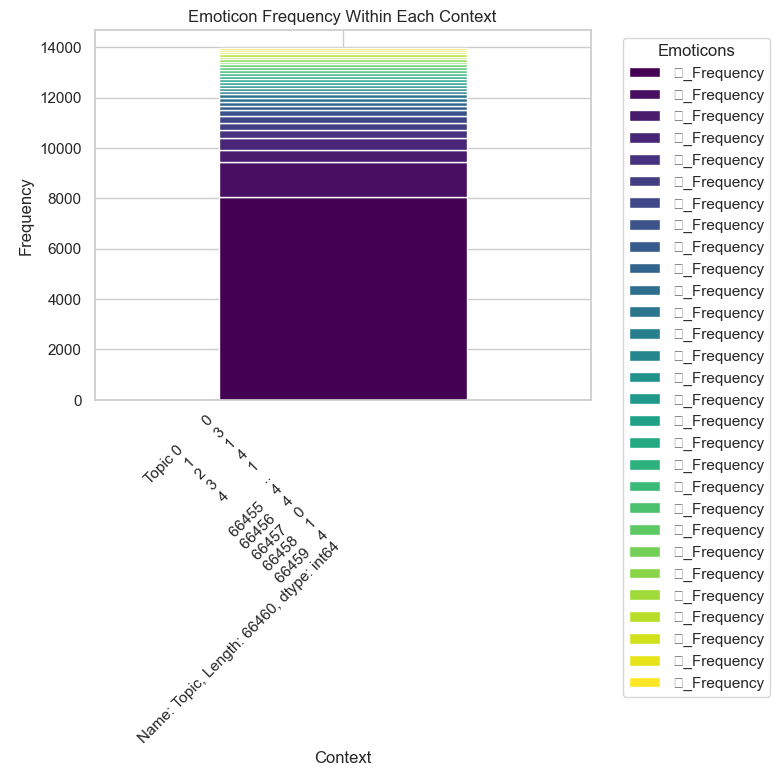

In [32]:
#Frequency analysis with visualisation
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame with the 'Context' and 'Text' columns
df = pd.read_csv('Emoji_Preserved_Cleaned_Contexts.csv')

# Specify the target emojis of interest
target_emojis = ['👉', '👈', '🥺', '👇', '🔥', '🔴', '💥', '🎯', '🎉', '😍', '🏆', '📺', '🐰', '🚀', '👀', '😳', '💯', '👌', '🥊', '💰', '👍', '🚨', '🙏', '😭', '🥹', '😂', '😎', '🔗', '💙']

# Create a new column 'Emoticon_Frequency' for each target emoji to store their frequency in each context
for emoji in target_emojis:
    df[f'{emoji}_Frequency'] = df['Text'].apply(lambda text: str(text).count(emoji) if pd.notnull(text) else 0)

# Group by 'Context' and calculate the total frequency of each target emoji in each context
emoticon_frequency_by_context = df.groupby('Context')[[f'{emoji}_Frequency' for emoji in target_emojis]].sum().reset_index()

# Set the 'Context' column as the index for better visualization
emoticon_frequency_by_context.set_index('Context', inplace=True)

# Plotting
plt.figure(figsize=(15, 8))
emoticon_frequency_by_context.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Emoticon Frequency Within Each Context')
plt.xlabel('Context')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Emoticons', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
